In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [330]:
madelon = pd.read_csv("/Users/rahulrajput/Desktop/MSBA/Winter/452 - Machine Learning/Assignment 5/madelon.csv")

In [331]:
madelon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 501 entries, Unnamed: 0 to V500
dtypes: int64(501)
memory usage: 9.9 MB


In [332]:
madelon.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,0,485,477,537,479,452,471,491,476,475,...,477,481,477,485,511,485,481,479,475,496
1,1,483,458,460,487,587,475,526,479,485,...,463,478,487,338,513,486,483,492,510,517
2,2,487,542,499,468,448,471,442,478,480,...,487,481,492,650,506,501,480,489,499,498
3,3,480,491,510,485,495,472,417,474,502,...,491,480,474,572,454,469,475,482,494,461
4,4,484,502,528,489,466,481,402,478,487,...,488,479,452,435,486,508,481,504,495,511


<AxesSubplot:ylabel='Frequency'>

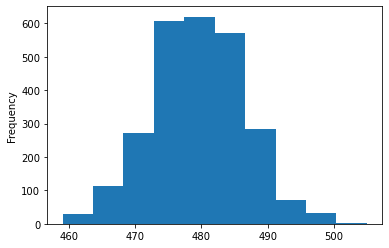

In [426]:
madelon.iloc[:,6].plot.hist()

Variables can be assumed to be distributed normally.

### Question 1 - K Means Clustering

##### Q 1.1
Data Pre-Processing

In [333]:
madelon.isnull().sum().value_counts()

0    501
dtype: int64

In [334]:
madelon.dtypes.value_counts()

int64    501
dtype: int64

In [335]:
madelon.corr()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
Unnamed: 0,1.000000,-0.028893,0.011170,-0.010767,-0.017169,-0.018586,-0.002053,0.020932,0.024432,0.031452,...,-0.007751,-0.017018,0.003928,0.005610,0.014001,-0.028065,-0.010035,-0.013236,0.026615,0.028318
V1,-0.028893,1.000000,0.020146,-0.032128,-0.004837,-0.008465,0.017893,0.032264,0.032043,-0.016334,...,-0.003820,0.021908,-0.000911,0.010597,0.008812,-0.035144,0.012457,-0.025676,0.012710,-0.032624
V2,0.011170,0.020146,1.000000,-0.013731,0.007702,0.024493,-0.013321,-0.019353,0.015763,0.000539,...,0.017191,0.008118,0.016305,0.021365,-0.009012,0.019448,0.040476,-0.004938,0.003167,0.018204
V3,-0.010767,-0.032128,-0.013731,1.000000,0.008097,0.000298,-0.004214,0.010097,-0.021142,0.013721,...,0.002427,-0.003908,0.010937,-0.005700,0.015542,0.048080,0.002344,0.028050,0.018470,0.018266
V4,-0.017169,-0.004837,0.007702,0.008097,1.000000,-0.003623,0.018354,0.000226,-0.015736,-0.026343,...,-0.002720,-0.049163,-0.027077,-0.001949,0.001835,0.020029,-0.010481,0.002225,-0.022801,0.006716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V496,-0.028065,-0.035144,0.019448,0.048080,0.020029,0.014977,0.009258,0.004995,0.010044,-0.002057,...,0.006966,-0.025653,-0.000817,0.003759,0.026165,1.000000,-0.004372,-0.015963,-0.014210,-0.011435
V497,-0.010035,0.012457,0.040476,0.002344,-0.010481,0.051843,0.015354,0.021644,0.019482,-0.020582,...,-0.017560,-0.000386,0.009611,-0.038100,-0.012500,-0.004372,1.000000,0.001988,-0.002512,-0.021976
V498,-0.013236,-0.025676,-0.004938,0.028050,0.002225,-0.001291,0.026771,-0.021079,0.011805,-0.009962,...,-0.007653,-0.028063,0.010635,-0.038109,-0.038224,-0.015963,0.001988,1.000000,-0.011878,0.021816
V499,0.026615,0.012710,0.003167,0.018470,-0.022801,0.033795,-0.013333,0.027172,0.009351,0.023399,...,-0.011883,-0.019491,0.028484,0.021823,-0.004360,-0.014210,-0.002512,-0.011878,1.000000,0.017021


In [336]:
for i in (0,500):
    for element in madelon.corr().iloc[i].abs().sort_values(ascending=False):
        if element > 0.25:
            print(element,i)
#madelon.corr().iloc[0].abs().sort_values(ascending=False)

1.0 0
1.0 500


<AxesSubplot:ylabel='Frequency'>

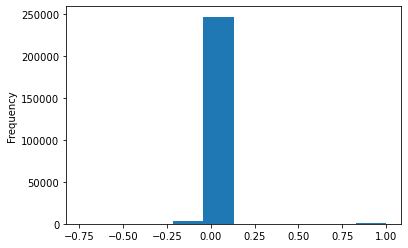

In [384]:
madelon.corr().stack().plot.hist()

In [337]:
madelon.describe()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,...,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,1299.500000,481.742308,483.551154,509.338846,483.364615,500.925769,479.351923,480.488462,476.569615,487.016154,...,482.255000,478.803462,486.250769,497.734615,493.812308,510.731538,478.151154,483.157308,508.436538,490.588077
std,750.699674,6.312905,30.338955,38.798710,8.943204,41.356829,6.896949,40.428218,1.391642,15.277242,...,20.857658,4.034889,23.682591,127.455585,34.883461,37.701112,5.863052,13.607801,37.030636,25.926791
min,0.000000,462.000000,377.000000,370.000000,453.000000,360.000000,459.000000,334.000000,471.000000,430.000000,...,407.000000,463.000000,391.000000,103.000000,368.000000,353.000000,457.000000,435.000000,363.000000,403.000000
25%,649.750000,478.000000,464.000000,484.000000,477.000000,474.000000,475.000000,453.000000,476.000000,477.000000,...,468.000000,476.000000,471.000000,405.750000,470.000000,486.000000,474.000000,474.000000,483.000000,473.000000
50%,1299.500000,482.000000,484.000000,509.000000,483.000000,500.000000,479.000000,481.000000,477.000000,487.000000,...,482.000000,479.000000,486.000000,505.500000,493.000000,510.000000,478.000000,483.000000,508.000000,491.000000
75%,1949.250000,486.000000,504.000000,535.000000,489.000000,527.000000,484.000000,507.000000,477.000000,497.000000,...,496.000000,481.000000,502.000000,586.250000,517.000000,536.000000,482.000000,492.000000,533.000000,508.000000
max,2599.000000,503.000000,610.000000,654.000000,519.000000,688.000000,505.000000,611.000000,482.000000,547.000000,...,549.000000,497.000000,571.000000,920.000000,615.000000,661.000000,500.000000,535.000000,644.000000,593.000000


(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 475.77615385,  558.14853846,  640.52092308,  722.89330769,
         805.26569231,  887.63807692,  970.01046154, 1052.38284615,
        1134.75523077, 1217.12761538, 1299.5       ]),
 <BarContainer object of 10 artists>)

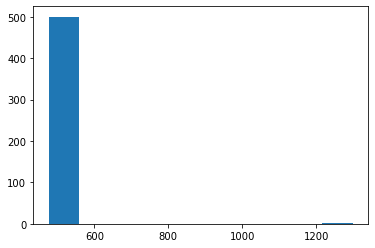

In [338]:
plt.hist(madelon.describe().iloc[1,:])

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 475.  ,  557.45,  639.9 ,  722.35,  804.8 ,  887.25,  969.7 ,
        1052.15, 1134.6 , 1217.05, 1299.5 ]),
 <BarContainer object of 10 artists>)

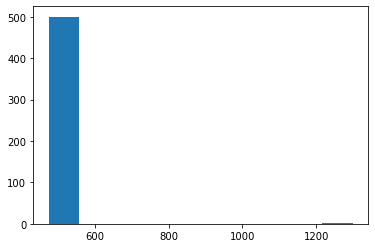

In [339]:
plt.hist(madelon.describe().iloc[5,:])

For Data Preprocessing I explored the datasets to check for NaNs or any Missing values in the dataset. I also checked for correlation between variables as well as explored the distributions of all variables to be able to draw better conclusions.

##### Q 1.2

The K-Means Clustering works by reducing the sum of squared distance of points from their respective cluster centroids. As the value of K increases the sum of squared distance decreases. However, after a certain point the marginal reduction in sum of squared error by increasing K becomes small, while simultaneously making computation more expensive.

In [340]:
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs

centroids = []
sumsquares = []
my_centroids = np.array([[1, 2, 3, 4, 5], [2, 4, 6, 5, 3], [1, 2, 5, 7, 1]])
#kmeans = KMeans(n_clusters=3, random_state=0, init=my_centroids)

for k in (4,8,16,32,64):
    model = KMeans(n_clusters = k, random_state=0)
    model.fit(madelon)
    sumsquares.append(model.inertia_)
    centroids.append(model.cluster_centers_)

In [341]:
sumsquares

[1272090424.86524,
 1179040142.9569304,
 1093609244.6490722,
 1024325475.6376696,
 969739166.3614271]

In [342]:
centroids[1][0]

array([2294.89102564,  481.91025641,  482.90705128,  507.30769231,
        483.1025641 ,  498.59935897,  479.50961538,  483.79487179,
        476.71794872,  488.94551282,  478.81410256,  485.60576923,
        492.31410256,  481.00320513,  479.83333333,  485.52564103,
        478.11858974,  478.61538462,  496.60897436,  482.87820513,
        477.09294872,  484.04807692,  493.625     ,  476.18589744,
        479.13141026,  497.79166667,  504.20512821,  486.47435897,
        481.15705128,  477.82051282,  490.89423077,  481.75641026,
        501.68910256,  501.36217949,  486.1025641 ,  488.26602564,
        485.45833333,  480.05448718,  481.32051282,  479.64423077,
        476.25      ,  476.53205128,  489.85576923,  476.60576923,
        488.58974359,  499.58653846,  482.05448718,  497.53846154,
        497.38141026,  494.40064103,  479.23076923,  520.47115385,
        504.13461538,  484.19230769,  480.51923077,  496.18589744,
        495.67628205,  479.82692308,  484.34935897,  505.10897

##### Q 1.3

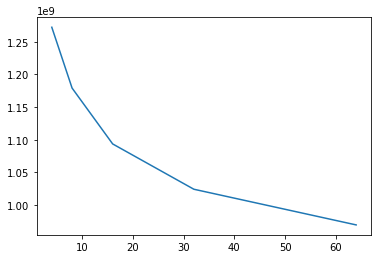

In [343]:
plt.plot([4,8,16,32,64],sumsquares)

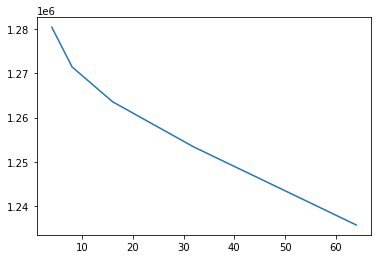

In [388]:
from sklearn.preprocessing import RobustScaler
object= StandardScaler()

madelon_std = object.fit_transform(madelon) 

centroids_std = []
sumsquares_std = []

for k in (4,8,16,32,64):
    model_std = KMeans(n_clusters = k, random_state=0)
    model_std.fit(madelon_std)
    sumsquares_std.append(model_std.inertia_)
    centroids_std.append(model_std.cluster_centers_)
    
plt.plot([4,8,16,32,64],sumsquares_std)

In [389]:
sumsquares_std

[1280446.6278058838,
 1271458.5914278587,
 1263568.6570007212,
 1253348.8097528722,
 1235704.3921124127]

In [390]:
# Uses KMeans++ to initialize centroids
model_8 = KMeans(n_clusters=8, random_state=0)
model_8.fit(madelon)
SSD_initial = model_8.inertia_
model_8.cluster_centers_

array([[2294.89102564,  481.91025641,  482.90705128, ...,  482.80448718,
         510.375     ,  491.06730769],
       [1301.58917197,  480.84713376,  483.93312102, ...,  484.11783439,
         504.97770701,  491.81528662],
       [ 931.33717579,  482.11815562,  484.05763689, ...,  483.92507205,
         507.70317003,  490.37752161],
       ...,
       [2388.39150943,  481.50943396,  484.35849057, ...,  482.48113208,
         510.85377358,  492.80660377],
       [1893.65797101,  481.69855072,  484.9826087 , ...,  482.98550725,
         510.71884058,  490.17391304],
       [ 608.09411765,  482.45588235,  482.36470588, ...,  483.73235294,
         510.11764706,  488.37058824]])

From the graph of Sum of Squared Distance of each point from it's respective centroid, for each K-Value, we observe that as the number of clusters increase the sum of squared erros decreases but in the form of an exponential decay. 
K = 32 seems to be the optimal K value. From K = 32 to K= 64 the fall in magnitude of sum of squared errors is small, compared to the increase in computation time.\
However, when using standardised data it is harder to determine the optimal K. It is likely that the optimal K lies beyond K=64 as the SSD is still decreasing extremely fast at that point.

##### Q 1.4

For the above K=8 model, the centroids were initialised through the KMeans++ method

In [391]:
for i in range(0,len(model_8.cluster_centers_)-1):
    np.array_equal(model_8.cluster_centers_[i], model_8.cluster_centers_[i+1])

In [392]:
np.random.seed(0)
centroids_new = np.random.random_sample((8,501))

# Using random centroids generated externally
model_8_new = KMeans(n_clusters=8, init=centroids_new, random_state=0)
model_8_new.fit(madelon)
SSD_new = model_8_new.inertia_

# Using inbuilt random method
model_8_new_random = KMeans(n_clusters=8, init="random", random_state=0)
model_8_new_random.fit(madelon)
SSD_new_random = model_8_new_random.inertia_

/Users/rahulrajput/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning:

Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.



In [393]:
print(SSD_initial,SSD_new_random)

1179040142.9569304 1178528703.528768


In [394]:
# Using inbuilt random method on standardised data
model_8_new_std = KMeans(n_clusters=8, init="random", random_state=1)
model_8_new_std.fit(madelon_std)
SSD_new_std = model_8_new_std.inertia_

# Using Kmeans++ on standardised data
model_8_old_std = KMeans(n_clusters=8, random_state=1)
model_8_old_std.fit(madelon_std)
SSD_old_std = model_8_old_std.inertia_

In [395]:
print(SSD_old_std,SSD_new_std)

1271251.5428698054 1271015.4423902065


The Sum of Squared Distances is a little higher when chosen randomly for non-standardised data whereas for standardised data the SSD is slightly lower when centroids are initialised randomly.

The default method for Centroids being chosen by the algorithm is "based on an empirical probability distribution of the points contribution to the overall inertia." This provides better convergence results. What this method does is choose centroids in such a manner that they are as distant from each other as possible.  After the first centroid has been chosen randomly, the other centroids are chosen from the X data points by assigning prob proportionate to distance squared from the first centroid.
The higher SSD could also be due to the algorithm running only one initialisation using the pre-defined centroids vs 10 initialisations when the centroids are randomly chosen by the algorithm.

Overall, however, there does not seem to be large variation between using K-Means++ initialized centroids and randomly initialized centroids. 

##### Q 1.5

For good clusters we would like to minimise the distance between points in a cluster and maximise distance between different clusters. 

The Silhouette Score is one such measure which utilises Euclidean/Manhattan distance.
Silhoutte Score = Mean(Nearest-Cluster distance for each Cluster) - Mean(Intra-Cluster distance for each Cluster)/Max(Nearest-Cluster distance , Intra-Cluster Distance)

Another way of comparing intra-cluster/inter-cluster distance ratio is the Calinski Harabaz Index. It caompraes variances as the ratio of within-cluster diffusion vs between-cluster dispersion.

### Question 2 - PCA

##### Q 2.1

In [397]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

object= RobustScaler()
madelon_standard = object.fit_transform(madelon) 

In [400]:
from sklearn.decomposition import PCA
from tqdm import tqdm

explained_variance = []
for i in tqdm(range(2,501)):
    pca = PCA(n_components = i)
    madelon_standard_new = pca.fit(madelon_standard)
    explained_variance.append(sum(pca.explained_variance_ratio_))
    #sum(explained_variance)

100%|█████████████████████████████████████████| 499/499 [02:37<00:00,  3.17it/s]


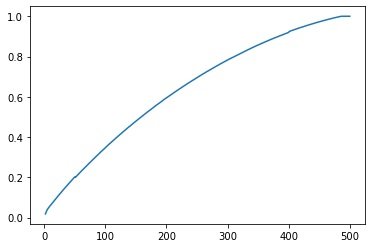

In [401]:
plt.plot(range(2,501),explained_variance)

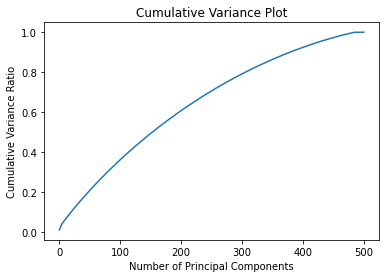

In [402]:
pca = PCA()
pca.fit(madelon_standard)
var_cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var_cumulative)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Plot')
plt.show()

In [403]:
n_components = np.where(var_cumulative > 0.75)[0][0] + 1
n_components

276

In [409]:
pca_75 = PCA(n_components = 281)
madelon_standard_75 = pca_75.fit_transform(madelon_standard)
sum(pca_75.explained_variance_ratio_)

0.7508437375962953

##### Q 2.2

In [354]:
madelon_standard

array([[-1.73138476,  0.51613623, -0.21597363, ..., -0.30556792,
        -0.90311629,  0.2087788 ],
       [-1.73005242,  0.19926393, -0.84235166, ...,  0.64995023,
         0.04222888,  1.01890759],
       [-1.72872007,  0.83300853,  1.92689861, ...,  0.42944604,
        -0.2548796 ,  0.28593392],
       ...,
       [ 1.72872007,  0.51613623,  0.0477645 , ..., -0.15856513,
        -0.66002753,  1.01890759],
       [ 1.73005242, -0.75135298, -0.47971175, ...,  0.50294744,
         2.82424466,  0.05446855],
       [ 1.73138476,  0.04082778, -1.00718799, ...,  0.79695303,
         0.74448529,  1.36610564]])

In [410]:
pca_75.explained_variance_ratio_

array([0.01052826, 0.00778408, 0.00759197, 0.00730303, 0.00660213,
       0.00448702, 0.00422623, 0.00416209, 0.00411375, 0.00403047,
       0.00398075, 0.00392928, 0.0039177 , 0.00390906, 0.00389797,
       0.00385623, 0.00383134, 0.00381092, 0.0037851 , 0.00375799,
       0.0037492 , 0.00374462, 0.00373036, 0.00371074, 0.00369401,
       0.00366942, 0.00366171, 0.00363838, 0.00363186, 0.00360532,
       0.00358816, 0.00357322, 0.00354796, 0.00353546, 0.00352927,
       0.00352226, 0.00350825, 0.00348817, 0.0034635 , 0.00345226,
       0.00344627, 0.00343275, 0.00341886, 0.0034124 , 0.00339665,
       0.00338473, 0.00337319, 0.00336292, 0.00336223, 0.00335388,
       0.00332712, 0.0033201 , 0.00331164, 0.00329718, 0.00328756,
       0.00328044, 0.00326544, 0.00325088, 0.00323917, 0.00322935,
       0.0032185 , 0.0032007 , 0.00319617, 0.00318893, 0.00318405,
       0.00316344, 0.0031548 , 0.00313865, 0.0031301 , 0.00311901,
       0.00311209, 0.0030999 , 0.00309232, 0.00308583, 0.00307

In [411]:
madelon_standard.shape

(2600, 501)

In [412]:
madelon_standard_75.shape

(2600, 281)

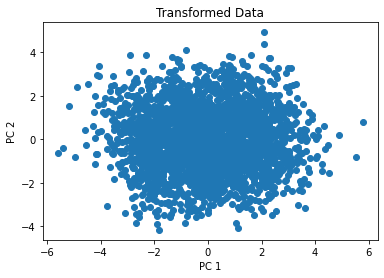

In [413]:
plt.scatter(madelon_standard_75[:, 0], madelon_standard_75[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Transformed Data')
plt.show()

In [414]:
## Calculating Loadings - Covariance between Original variables and Principal Components:
# The loadings are the association coefficients between the components and the variables 
# and they are directly comparable with the association coefficients computed between the variables - 
# covariances, correlations or other scalar products, on which you base your PCA. 
# Each original variable has a vector of loadings: Basically defining how it can be translated to the new
# PC Co-ordinate system. The magnitude of each element for the loading vector of an original variable represents
# the contribution of the variable to 'explaining variance' in the new Co-ord system

# Loadings are what link the original unstandardized variables to the new Co-ordinate system. 

## Explained variance - Eigenvalues for the new Eigenvectors

## .components calculates what each original data point contributes to this particular PC axis
loadings = pca_75.components_.T * np.sqrt(pca_75.explained_variance_)
loadings_abs_sum = np.abs(loadings).sum(axis=1)
top2 = loadings_abs_sum.argsort()[::-1][:2]

In [415]:
top2

array([393,  54])

In [416]:
loadings_abs_sum[383]

8.902898409689179

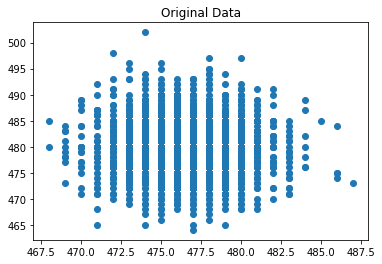

In [417]:
plt.scatter(madelon.iloc[:, top2[0]], madelon.iloc[:, top2[1]])
#plt.xlabel(f"Variable {top2[0]}")
#plt.ylabel(f"Variable {top2[1]}")
plt.title('Original Data')
plt.show()

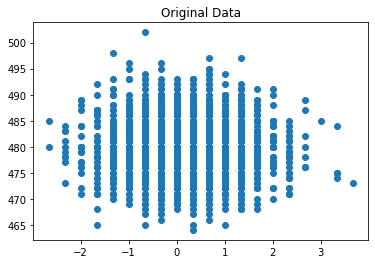

In [421]:
plt.scatter(madelon_standard[:, top2[0]], madelon.iloc[:, top2[1]])
#plt.xlabel(f"Variable {top2[0]}")
#plt.ylabel(f"Variable {top2[1]}")
plt.title('Original Data')
plt.show()

##### Q 2.3

The scatter plot of the transformed data with the first two principal components does not show multiple clusters. Although the cluster is spread quite wide horizontally.

The scatter plot of the original data with the two variables that have the highest absolute combined loading for PC 1 and PC 2 has one large cluster only. It is more compact than the cluster from the plot above.

Overall, from the dataset it can be seen that most of the 500 features are extremely similar in terms of their values and distributions implying that there may not actually be multiple distributions within the data. Eveidence for this can also be seen from the fact that it took over 280 components to explain 75% of the variation in data, which seems unusual. 

From the histogram plot of all correlation values between variables, we can observe that the spread of correlations is extremely small and the values are quite similar. Since most variables contribute to roughly same amount of correlation overall, the PCA algorithm finds it hard to identify dimensions which would explain a larger proportion of variance.

### Question 3

##### Q 3.1

1. Since there would now be fewer dimensions, with less important features being filtered out, the noise within clusters can be reduced and they can be better identified.
2. PCA allows to reduce the sparsity within the data allowing for more accurate Clusters being formed.
3. Clustering would now be less computationally intensive.

##### Q 3.2

In [363]:
sumsquares_transformed = []
for k in (4,8,16,32,64,128):
    model = KMeans(n_clusters = k, random_state=0)
    model.fit(madelon_standard_75)
    sumsquares_transformed.append(model.inertia_)
    centroids.append(model.cluster_centers_)

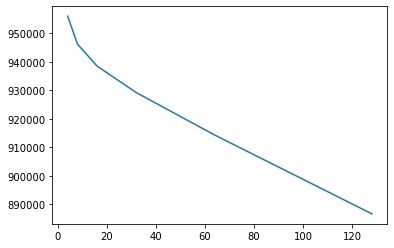

In [364]:
plt.plot([4,8,16,32,64,128],sumsquares_transformed)

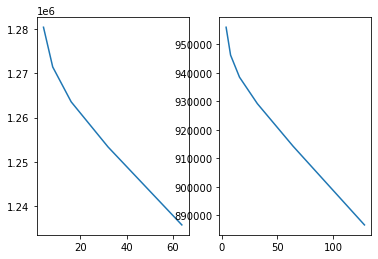

In [386]:
fig, (axs1,axs2) = plt.subplots(1,2)

axs1.plot([4,8,16,32,64],sumsquares_std)
axs2.plot([4,8,16,32,64,128],sumsquares_transformed)

The Elbow Plow made using the transformed data is not too different to the one made using the original data. There does not seem to be an optimal K for the transformed data as well since the function is still decreasing rapidly at K=64. 

On using another K-value, 128, it is still hard to find the optimal K for the transformed data as the function is still rapidly decreasing at K=128.

However the Squared Distance values are lower after performing the K-Means analysis on the PCA data.

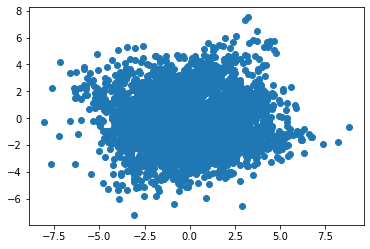

In [367]:
plt.scatter(madelon_standard_75[:, 0], madelon_standard_75[:, 1])

##### Q 3.3

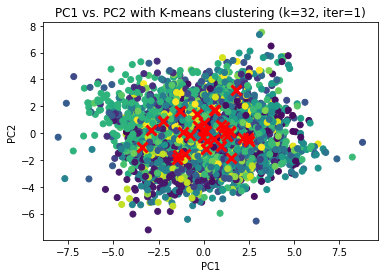

In [387]:
kmeans_final = KMeans(n_clusters=32, max_iter=1)
kmeans_final.fit(madelon_standard_75)
cluster_centers_final = kmeans_final.cluster_centers_
labels = kmeans_final.labels_

# plot the results
plt.scatter(madelon_standard_75[:, 0], madelon_standard_75[:, 1], c=labels)
plt.scatter(cluster_centers_final[:, 0], cluster_centers_final[:, 1], marker='x', s=100, linewidths=3, c='r')
plt.title("PC1 vs. PC2 with K-means clustering (k=32, iter=1)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

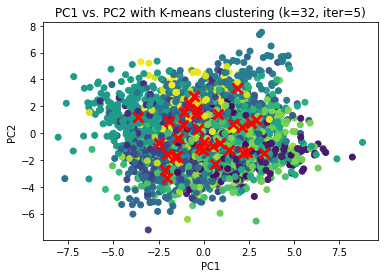

In [368]:
kmeans_final = KMeans(n_clusters=32, max_iter=5)
kmeans_final.fit(madelon_standard_75)
cluster_centers_final = kmeans_final.cluster_centers_
labels = kmeans_final.labels_

# plot the results
plt.scatter(madelon_standard_75[:, 0], madelon_standard_75[:, 1], c=labels)
plt.scatter(cluster_centers_final[:, 0], cluster_centers_final[:, 1], marker='x', s=100, linewidths=3, c='r')
plt.title("PC1 vs. PC2 with K-means clustering (k=32, iter=5)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

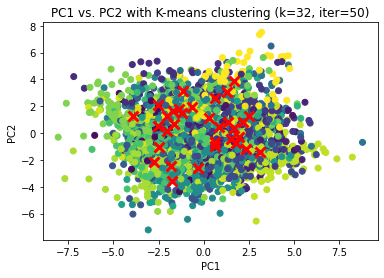

In [369]:
kmeans_final = KMeans(n_clusters=32, max_iter=50)
kmeans_final.fit(madelon_standard_75)
cluster_centers_final = kmeans_final.cluster_centers_
labels = kmeans_final.labels_

# plot the results
plt.scatter(madelon_standard_75[:, 0], madelon_standard_75[:, 1], c=labels)
plt.scatter(cluster_centers_final[:, 0], cluster_centers_final[:, 1], marker='x', s=100, linewidths=3, c='r')
plt.title("PC1 vs. PC2 with K-means clustering (k=32, iter=50)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

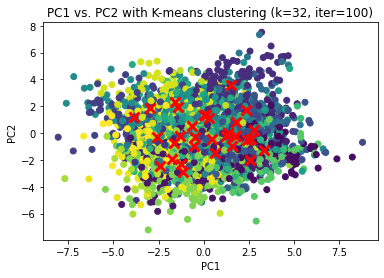

In [370]:
kmeans_final = KMeans(n_clusters=32, max_iter=100)
kmeans_final.fit(madelon_standard_75)
cluster_centers_final = kmeans_final.cluster_centers_
labels = kmeans_final.labels_

# plot the results
plt.scatter(madelon_standard_75[:, 0], madelon_standard_75[:, 1], c=labels)
plt.scatter(cluster_centers_final[:, 0], cluster_centers_final[:, 1], marker='x', s=100, linewidths=3, c='r')
plt.title("PC1 vs. PC2 with K-means clustering (k=32, iter=100)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

After only 5 iterations, the algorithm does not seem to be converging. Different cluster data points are spread randomly.
Increasing the number of iterations to 50 and then 100, there seems to be more convergence for cluster data points.